<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Day 3)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set  (Life Expectancy data)

The dataset contains information about several health and economic factors that contribute to average life expectancy for different countries. <br> Attribute information: 

**Country:** Name of the country

**Year:** Year the observations were recorded

**Status:** Whether the country is Developed or Developing

**Adult_Mortality:** Mortality rate for age group 15-60 out of every 1000 individuals of the population

**Infant_Deaths:** Number of infant deaths per 1000 population

**Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**Hepatitis B:** Hepatitis B (HepB) immunization coverage for 1 year olds (Percentage)

**Measles:** Number of reported cases for measles per 1000 from population

**BMI:** Average Body Mass Index for entire population

**Underfive_Deaths:** Number of deaths under 5 years of age per 1000 population

**Polio:** Polio (Pol3) immunization coverage for 1 year olds (Percentage)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage for 1 year olds (Percentage)

**HIV:** Deaths per 1000 live births due to HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**Malnourished10_19:** Prevalence of malnutrition among children and adolescents for Age 10 to 19 (Percentage)

**Malnourished5_9:** Prevalence of malnutrition among children for Age 5 to 9 (Percentage)

**Income_Index:** Human Development Index (HDI) in terms of national income per capita (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling

**Life_Expectancy:** Life Expectancy in age for the country


##  Table of Content

1. **[Data Preparation](#eda)**
2. **[Linear Regression](#lf)**
3. **[Gradient Descent](#gd)**
4. **[Regularization](#reg)**
5. **[Grid Search](#gs)**

**Import the required libraries**

In [183]:
# type your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Load the Life expectancy dataset and display the first five records 

In [184]:
# load the csv file
df = pd.read_csv("Life_Expectancy.csv")

# type your code here

# display the first five observations
df.head()
# type your code here

,Country,Year,Status,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Albania,2015,Developing,74.0,0,4.60,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8
2,Algeria,2015,Developing,19.0,21,NaN,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6
3,Angola,2015,Developing,335.0,66,NaN,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4
4,Antigua,2015,Developing,13.0,0,NaN,99.0,0,47.7,0,86,99,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9,76.4


#### Check the shape of the data and display its information

In [185]:
# check the size of the dataframe
df.shape
# type your code here

(182, 20)

In [186]:
# display dataset information understand the dataset

# type your code here
df.describe()

,Year,Adult_Mortality,Infant_Deaths,Alcohol,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy
count,182.000000,173.000000,182.000000,15.000000,173.000000,182.000000,178.000000,182.000000,182.000000,182.000000,182.00000,157.000000,1.410000e+02,178.000000,178.000000,169.000000,173.000000,173.000000
mean,2014.890110,149.971098,21.741758,2.719333,81.710983,1482.104396,44.411236,28.851648,82.961538,84.357143,0.62033,7098.949079,1.133250e+07,4.368539,4.412360,0.696586,12.845665,72.007514
std,0.457003,95.679846,82.297159,3.887194,25.391991,7859.929395,21.305610,105.904392,24.973658,22.958019,1.33283,11603.099478,2.912065e+07,4.137007,4.223363,0.152706,3.215180,8.032405
min,2013.000000,1.000000,0.000000,0.010000,6.000000,0.000000,2.500000,0.000000,5.000000,6.000000,0.10000,33.681223,2.920000e+02,0.100000,0.100000,0.347000,0.000000,51.000000
25%,2015.000000,74.000000,0.000000,0.010000,78.000000,0.000000,24.425000,0.000000,83.250000,84.000000,0.10000,762.261218,2.635310e+05,1.500000,1.400000,0.575000,10.800000,66.200000
50%,2015.000000,137.000000,2.000000,0.010000,93.000000,9.000000,52.650000,2.000000,93.000000,94.000000,0.10000,3111.762887,1.977527e+06,3.150000,3.250000,0.733000,13.100000,74.100000
75%,2015.000000,199.000000,15.000000,5.285000,97.000000,197.250000,62.100000,19.500000,97.750000,97.000000,0.30000,6993.477360,1.127366e+07,6.400000,6.200000,0.799000,15.000000,77.100000
max,2015.000000,484.000000,910.000000,10.660000,99.000000,90387.000000,87.300000,1100.000000,99.000000,99.000000,9.30000,66346.522670,2.581621e+08,26.700000,27.300000,0.948000,20.400000,88.000000


### Let's begin with some hands-on practice exercises

<a id="eda"> </a>
## 1. Data Preparation

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. The dataset gives the life expectancy for different countries. Check if any information about life expectancy is missing from the given records. How do we fix the problem if present?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [187]:
# type your code here
(df.isnull().sum()/len(df))*100

Country               0.000000
Year                  0.000000
Status                0.000000
Adult_Mortality       4.945055
Infant_Deaths         0.000000
Alcohol              91.758242
Hepatitis B           4.945055
Measles               0.000000
BMI                   2.197802
Underfive_Deaths      0.000000
Polio                 0.000000
Diphtheria            0.000000
HIV                   0.000000
GDP                  13.736264
Population           22.527473
Malnourished10_19     2.197802
Malnourished5_9       2.197802
Income_Index          7.142857
Schooling             4.945055
Life_Expectancy       4.945055
dtype: float64

C:\Users\WELCOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Measles '>

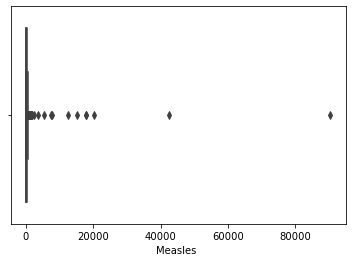

In [241]:

#Since alcohol has 91% of the data missing we can dro the feature from the dataframe

#since adult mortality has some outliers we can impute the missing values with median
sns.boxplot(df["Measles "])
#since BMI has no outliers we can impute that with mean value
#since GDP has a lot of outliers we can impute that with the median value
#since population has a lot of outliers we can impute that with the median value
#since Malnourished10_19  has a lot of outliers we can impute that with the median value
#since Malnourished5_9  has a lot of outliers we can impute that with the median value
#since Income_Index  has no outliers we can impute that with the mean value
#since Schooling  has a lot of outliers we can impute that with the median value
#since Life expectancy  has no outliers we can impute that with the mean value

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. How do we handle the missing values from the entire dataset?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [189]:
# type your code here
df.drop(columns = "Alcohol",inplace = True)
df["BMI"].fillna(df["BMI"].mean(),inplace = True)
df["GDP"].fillna(df["GDP"].median(),inplace = True)
df["Hepatitis B"].fillna(df["Hepatitis B"].median(),inplace = True)
df["Adult_Mortality"].fillna(df["Adult_Mortality"].median(),inplace = True)
df["Population"].fillna(df["Population"].median(),inplace = True)
df["Malnourished10_19"].fillna(df["Malnourished10_19"].median(),inplace = True)
df["Malnourished5_9"].fillna(df["Malnourished5_9"].median(),inplace = True)
df["Income_Index"].fillna(df["Income_Index"].mean(),inplace = True)
df["Schooling"].fillna(df["Schooling"].median(),inplace = True)
df["Life_Expectancy"].fillna(df["Life_Expectancy"].mean(),inplace = True)
df.isnull().sum()

Country              0
Year                 0
Status               0
Adult_Mortality      0
Infant_Deaths        0
Hepatitis B          0
Measles              0
BMI                  0
Underfive_Deaths     0
Polio                0
Diphtheria           0
HIV                  0
GDP                  0
Population           0
Malnourished10_19    0
Malnourished5_9      0
Income_Index         0
Schooling            0
Life_Expectancy      0
dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Are there any redundant features in the data?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [190]:
# type your code here
# There are no duplicated rows in the data


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Perform dummy encoding for appropriate variables of the dataset if required</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [191]:
# type your code here
df = pd.get_dummies(df,columns = ["Status"])
df.head()
df.isnull().sum()

Country              0
Year                 0
Adult_Mortality      0
Infant_Deaths        0
Hepatitis B          0
Measles              0
BMI                  0
Underfive_Deaths     0
Polio                0
Diphtheria           0
HIV                  0
GDP                  0
Population           0
Malnourished10_19    0
Malnourished5_9      0
Income_Index         0
Schooling            0
Life_Expectancy      0
Status_Developed     0
Status_Developing    0
dtype: int64

In [192]:
df.set_index("Country",inplace = True)
df.head()

,Year,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy,Status_Developed,Status_Developing
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,263.0,62,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0,0,1
Albania,2015,74.0,0,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8,0,1
Algeria,2015,19.0,21,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6,0,1
Angola,2015,335.0,66,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4,0,1
Antigua,2015,13.0,0,99.0,0,47.7,0,86,99,0.2,13566.954100,1977527.0,3.3,3.3,0.784,13.9,76.4,0,1


<a id="lf"> </a>
## 2. Linear Regression

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5.  Build a full model on the given data. Check whether the obtained residuals have constant variance
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

C:\Users\WELCOME\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

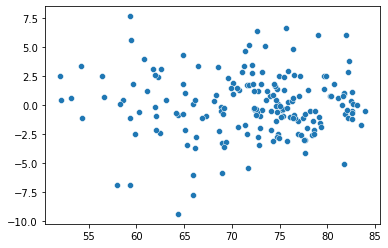

In [193]:
# type your code here
x = df.drop(columns = "Life_Expectancy")
y = df["Life_Expectancy"]

from statsmodels import api
xc = api.add_constant(x)
ols_model = api.OLS(y,xc)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
linear_model.summary()
resid = linear_model.resid
sns.scatterplot(y_pred,resid)
#the obtained residuals does not have a constant variance

In [194]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     73.00
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           3.01e-67
Time:                        19:54:58   Log-Likelihood:                -436.84
No. Observations:                 182   AIC:                             909.7
Df Residuals:                     164   BIC:                             967.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -718.7576    684.737     -1.050      0.295   -2070.795     633.280
Year                  0.5621      0.510      1.103      0.272      -0.444       1.569
Adult_Mortality      -0.0236      0.003     -6.899      0.000      -0.030      -0.017
Infant_Deaths         0.1012      0.032      3.122      0.002       0.037       0.165
Hepatitis B           0.0402      0.021      1.919      0.057      -0.001       0.082
Measles           -8.612e-05   5.48e-05     -1.571      0.118      -0.000    2.21e-05
BMI                  -0.0113      0.013     -0.860      0.391      -0.037       0.015
Underfive_Deaths     -0.0731      0.023     -3.112      0.002      -0.119      -0.027
Polio                 0.0136      0.013      1.086      0.279      -0.011       0.038
Diphtheria           -0.0042      0.024     -0.174      0.862      -0.052       0.044
HIV                  -0.5041      0.220     -2.289      0.023      -0.939      -0.069
GDP               -7.045e-06   2.29e-05     -0.308      0.758   -5.22e-05    3.81e-05
Population         2.169e-09   9.67e-09      0.224      0.823   -1.69e-08    2.13e-08
Malnourished10_19    -0.1252      0.236     -0.531      0.596      -0.591       0.341
Malnourished5_9      -0.0827      0.234     -0.354      0.724      -0.544       0.379
Income_Index         30.4272      3.663      8.307      0.000      23.195      37.660
Schooling            -0.1538      0.138     -1.114      0.267      -0.426       0.119
Status_Developed   -358.7295    342.402     -1.048      0.296   -1034.814     317.355
Status_Developing  -360.0281    342.336     -1.052      0.294   -1035.982     315.926
==============================================================================
Omnibus:                        6.762   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.034   Jarque-Bera (JB):               10.019
Skew:                          -0.163   Prob(JB):                      0.00667
Kurtosis:                       4.102   Cond. No.                     6.06e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.73e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [195]:
df.head()

,Year,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy,Status_Developed,Status_Developing
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,263.0,62,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0,0,1
Albania,2015,74.0,0,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8,0,1
Algeria,2015,19.0,21,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6,0,1
Angola,2015,335.0,66,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4,0,1
Antigua,2015,13.0,0,99.0,0,47.7,0,86,99,0.2,13566.954100,1977527.0,3.3,3.3,0.784,13.9,76.4,0,1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Build a model to study the impact of immunization on life expectancy, using least squares regression. Find the unexplained variation for the model
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [218]:
# type your code here
a = df[["Polio"]]
x = a
y = df["Life_Expectancy"]

from statsmodels import api
xc = api.add_constant(x)
ols_model = api.OLS(y,xc)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
linear_model.summary()
SSE = np.sum((y - y_pred)**2)
SSE



8071.5069626625145

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build a model to study the impact of malnutrition on life expectancy, using least squares regression. Interpret the coeffients</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [219]:
# type your code here
a = df[["Malnourished10_19","Malnourished5_9"]]
x = a
y = df["Life_Expectancy"]

from statsmodels import api
xc = api.add_constant(x)
ols_model = api.OLS(y,xc)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
linear_model.summary()
#B1: Malnourished5_9  : -0.5025
#B1: Malnourished10_19 :-0.3791

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     24.48
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           3.99e-10
Time:                        20:09:01   Log-Likelihood:                -610.29
No. Observations:                 182   AIC:                             1227.
Df Residuals:                     179   BIC:                             1236.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                75.8578      0.756    100.355      0.000      74.366      77.349
Malnourished10_19    -0.3791      0.552     -0.687      0.493      -1.469       0.711
Malnourished5_9      -0.5025      0.541     -0.929      0.354      -1.570       0.565
==============================================================================
Omnibus:                        6.328   Durbin-Watson:                   1.855
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                6.521
Skew:                          -0.458   Prob(JB):                       0.0384
Kurtosis:                       2.850   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<a id="gd"> </a>
## 3. Gradient Descent

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a model to study the influence of adult mortality rate on life expectancy using both the least squares regression and gradient descent approach. Are the fits for both the models different?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [224]:
# type your code here
x = df["Adult_Mortality"]
y = df["Life_Expectancy"]

from statsmodels import api
xc = api.add_constant(x)
ols_model = api.OLS(y,xc)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.598
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     268.2
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           1.70e-37
Time:                        20:20:07   Log-Likelihood:                -549.29
No. Observations:                 182   AIC:                             1103.
Df Residuals:                     180   BIC:                             1109.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              81.7004      0.697    117.144      0.000      80.324      83.077
Adult_Mortality    -0.0649      0.004    -16.376      0.000      -0.073      -0.057
==============================================================================
Omnibus:                       80.776   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              290.899
Skew:                          -1.775   Prob(JB):                     6.79e-64
Kurtosis:                       8.075   Cond. No.                         333.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Build a model to analyze the influence of immunization on life expectancy. Use SGD and plot a horizontal multiple barchart to compare the values of beta coefficients with values obtained by the full model build least squares regression.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:
# type your code here

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full model using least squares regression. Check whether the model overfits the training data or not.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [230]:
# type your code here
x = df.drop(columns = "Life_Expectancy")
y = df["Life_Expectancy"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
from sklearn.metrics import mean_squared_error
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
print(r2_train,r2_test)

# Since te accuracy is lower in test than in train we can tell that the odel overfits with the data 


0.8934890217361207 0.8476106347743302


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Can we use a linear regression model to analyze how all features from the dataset impact life expectancy?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [ ]:

#Yes by using linear regression ols model we can check the pvalue for all the features and can remove the features 
#one by one which has a p val greater than 0.05

In [231]:
from statsmodels import api
xc = api.add_constant(x)
ols_model = api.OLS(y,xc)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
linear_model.summary()

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vf = [vif(xc.values,i) for i in range(xc.shape[1])]
pd.DataFrame(vf,index = xc.columns,columns = ["vif"])

C:\Users\WELCOME\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\WELCOME\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif
const,0.000000
Year,1.243628
Adult_Mortality,2.338937
Infant_Deaths,163.115717
Hepatitis B,6.229449
Measles,4.255667
BMI,1.754867
Underfive_Deaths,141.806420
Polio,2.245398
Diphtheria,7.201280


<a id="reg"> </a>
## 4. Regularization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Can we perform regression analysis without eliminating features involved in multicollinearity detected in question 11?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [235]:
# type your code here
#Yes by using lasso regression
x = df.drop(columns = "Life_Expectancy")
y = df["Life_Expectancy"]

from sklearn.linear_model import Ridge
lr  = Ridge(alpha = 0.001)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)


lr.fit(x_train,y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
from sklearn.metrics import mean_squared_error
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
r2_train,r2_test

#Ridge regression can be used 




C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.981e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


(0.8891376759818838, 0.8309647998958702)

In [236]:
df.head()

,Year,Adult_Mortality,Infant_Deaths,Hepatitis B,Measles,BMI,Underfive_Deaths,Polio,Diphtheria,HIV,GDP,Population,Malnourished10_19,Malnourished5_9,Income_Index,Schooling,Life_Expectancy,Status_Developed,Status_Developing
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,2015,263.0,62,65.0,1154,19.1,83,6,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0,0,1
Albania,2015,74.0,0,99.0,0,58.0,0,99,99,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2,77.8,0,1
Algeria,2015,19.0,21,95.0,63,59.5,24,95,95,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4,75.6,0,1
Angola,2015,335.0,66,64.0,118,23.3,98,7,64,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4,52.4,0,1
Antigua,2015,13.0,0,99.0,0,47.7,0,86,99,0.2,13566.954100,1977527.0,3.3,3.3,0.784,13.9,76.4,0,1


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Build a model to study the impact of diseases and immunization on life expectancy. Identify the significant variables from the model. Use 'alpha = 1.5' if required.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [244]:
# type your code here
x = df[["Hepatitis B","Measles ","Polio","Diphtheria "]]
y = df["Life_Expectancy"]

from statsmodels import api
xc = api.add_constant(x)
ols_model = api.OLS(y,xc)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
linear_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     21.12
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           2.98e-14
Time:                        20:41:52   Log-Likelihood:                -596.79
No. Observations:                 182   AIC:                             1204.
Df Residuals:                     177   BIC:                             1220.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          55.5040      1.925     28.836      0.000      51.706      59.303
Hepatitis B    -0.0473      0.045     -1.049      0.296      -0.136       0.042
Measles     -7.102e-05   6.17e-05     -1.151      0.251      -0.000    5.07e-05
Polio           0.1032      0.026      3.897      0.000       0.051       0.156
Diphtheria      0.1414      0.053      2.674      0.008       0.037       0.246
==============================================================================
Omnibus:                        6.161   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                6.205
Skew:                          -0.452   Prob(JB):                       0.0449
Kurtosis:                       2.964   Cond. No.                     3.18e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# polio and diptheria are the significant variables

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Build a model to study the impact of malnutrition and diseases on life expectancy. Identify the insignificant variables from the model. Use 'alpha = 1' if required.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [247]:
# type your code here
x = df[["Hepatitis B","Measles ","Malnourished10_19","Malnourished5_9"]]
y = df["Life_Expectancy"]
from statsmodels import api
xc = api.add_constant(x)
ols_model = api.OLS(y,xc)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
linear_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     26.69
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           2.48e-17
Time:                        21:28:42   Log-Likelihood:                -589.35
No. Observations:                 182   AIC:                             1189.
Df Residuals:                     177   BIC:                             1205.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                65.4036      1.738     37.622      0.000      61.973      68.834
Hepatitis B           0.1258      0.019      6.619      0.000       0.088       0.163
Measles            7.272e-05   6.31e-05      1.152      0.251   -5.18e-05       0.000
Malnourished10_19    -0.9396      0.502     -1.871      0.063      -1.931       0.051
Malnourished5_9       0.0509      0.492      0.103      0.918      -0.921       1.023
==============================================================================
Omnibus:                        5.952   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                6.101
Skew:                          -0.443   Prob(JB):                       0.0473
Kurtosis:                       2.862   Cond. No.                     3.00e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [248]:
#Hepatitis B  is a significant variable

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build a full model using the elastic net regression. Use 'alpha = 0.1' and 'l1_ratio=0.001'. Also, compute the RMSE for train and test sets.
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [251]:
# type your code here
x = df.drop(columns = "Life_Expectancy")
y = df["Life_Expectancy"]

from sklearn.linear_model import ElasticNet
lr  = ElasticNet(alpha = 0.1,l1_ratio = 0.001)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)


lr.fit(x_train,y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
from sklearn.metrics import mean_squared_error
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
np.sqrt(r2_train),np.sqrt(r2_test)

C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 586.2701732989236, tolerance: 0.8407804066821662
  model = cd_fast.enet_coordinate_descent(


(0.9296716966972072, 0.8518979725651439)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Build a full model. Identify the features that are significantly influencing the life expectancy. Use 'alpha = 0.5' if required. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [252]:
# type your code here
x = df.drop(columns = "Life_Expectancy")
y = df["Life_Expectancy"]

from statsmodels import api
xc = api.add_constant(x)
ols_model = api.OLS(y,xc)
linear_model = ols_model.fit()
y_pred = linear_model.predict()
linear_model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     73.00
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           3.01e-67
Time:                        21:34:53   Log-Likelihood:                -436.84
No. Observations:                 182   AIC:                             909.7
Df Residuals:                     164   BIC:                             967.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -718.7576    684.737     -1.050      0.295   -2070.795     633.280
Year                  0.5621      0.510      1.103      0.272      -0.444       1.569
Adult_Mortality      -0.0236      0.003     -6.899      0.000      -0.030      -0.017
Infant_Deaths         0.1012      0.032      3.122      0.002       0.037       0.165
Hepatitis B           0.0402      0.021      1.919      0.057      -0.001       0.082
Measles           -8.612e-05   5.48e-05     -1.571      0.118      -0.000    2.21e-05
BMI                  -0.0113      0.013     -0.860      0.391      -0.037       0.015
Underfive_Deaths     -0.0731      0.023     -3.112      0.002      -0.119      -0.027
Polio                 0.0136      0.013      1.086      0.279      -0.011       0.038
Diphtheria           -0.0042      0.024     -0.174      0.862      -0.052       0.044
HIV                  -0.5041      0.220     -2.289      0.023      -0.939      -0.069
GDP               -7.045e-06   2.29e-05     -0.308      0.758   -5.22e-05    3.81e-05
Population         2.169e-09   9.67e-09      0.224      0.823   -1.69e-08    2.13e-08
Malnourished10_19    -0.1252      0.236     -0.531      0.596      -0.591       0.341
Malnourished5_9      -0.0827      0.234     -0.354      0.724      -0.544       0.379
Income_Index         30.4272      3.663      8.307      0.000      23.195      37.660
Schooling            -0.1538      0.138     -1.114      0.267      -0.426       0.119
Status_Developed   -358.7295    342.402     -1.048      0.296   -1034.814     317.355
Status_Developing  -360.0281    342.336     -1.052      0.294   -1035.982     315.926
==============================================================================
Omnibus:                        6.762   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.034   Jarque-Bera (JB):               10.019
Skew:                          -0.163   Prob(JB):                      0.00667
Kurtosis:                       4.102   Cond. No.                     6.06e+22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.73e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
#adult mortality,infant_deaths,hepatitis b,underfive_deaths,HIV,Income index are significant variables which will contribute in 
#predicting the life expectancy

<a id="gs"> </a>
## 5. Grid Search 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. If ridge regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [261]:
# type your code here
x = df.drop(columns = "Life_Expectancy")
y = df["Life_Expectancy"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

from sklearn.linear_model import Ridge
lr = Ridge(normalize = True)
from sklearn.model_selection import GridSearchCV
params = {"alpha":[7,8,9,10,11]}
alpha = GridSearchCV(estimator = lr,param_grid = params,cv = 5,scoring = 'r2')
alpha.fit(x_train,y_train)
print(alpha.best_params_)

from sklearn.linear_model import Ridge
lr  = Ridge(alpha = 7)



lr.fit(x_train,y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
from sklearn.metrics import mean_squared_error
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
np.sqrt(r2_train),np.sqrt(r2_test)

{'alpha': 7}


C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=6.28927e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


(0.9168540386096802, 0.8934880485246739)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. If lasso regression is used to build a full model. Which value is the best alpha from the list of values?<br><br>Consider the alpha values: [7,8,9,10,11]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [262]:
# type your code here

x = df.drop(columns = "Life_Expectancy")
y = df["Life_Expectancy"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

from sklearn.linear_model import Lasso
lr = Lasso(normalize = True)
from sklearn.model_selection import GridSearchCV
params = {"alpha":[7,8,9,10,11]}
alpha = GridSearchCV(estimator = lr,param_grid = params,cv = 5,scoring = 'r2')
alpha.fit(x_train,y_train)
print(alpha.best_params_)

from sklearn.linear_model import Ridge
lr  = Lasso(alpha = 7)



lr.fit(x_train,y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
from sklearn.metrics import mean_squared_error
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
np.sqrt(r2_train),np.sqrt(r2_test)

{'alpha': 7}


(0.8513039698991287, 0.8346842532361591)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Perform regression analysis to study the impact of malnutrition and diseases on life expectancy. Determine the optimal value of alpha and mixing parameter if elastic net regression is used to build the model. Consider the following list of values:<br><br> alpha : [0.1,0.5,1,1.5,2,2.5,3,3.5,4]<br> l1_ratio : [0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9] </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [265]:
# type your code here
x = df[["Hepatitis B","Measles ","Malnourished10_19","Malnourished5_9"]]
y = df["Life_Expectancy"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

from sklearn.linear_model import ElasticNet
lr = ElasticNet(normalize = True)
from sklearn.model_selection import GridSearchCV
params = {"alpha":[7,8,9,10,11],"l1_ratio":[0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]}
alpha = GridSearchCV(estimator = lr,param_grid = params,cv = 5,scoring = 'r2')
alpha.fit(x_train,y_train)
print(alpha.best_params_)

from sklearn.linear_model import Ridge
lr  = ElasticNet(alpha = 7,l1_ratio =  0.5)



lr.fit(x_train,y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
from sklearn.metrics import mean_squared_error
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
np.sqrt(r2_train),np.sqrt(r2_test)

{'alpha': 7, 'l1_ratio': 0.5}


(0.5878117258406295, 0.500853291501798)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Build a full model. Select the optimal value for elastic net mixing parameter if the alpha value is 0.8<br><br>Consider the values: l1_ratio : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [267]:
# type your code here
x = df.drop(columns = "Life_Expectancy")
y = df["Life_Expectancy"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

from sklearn.linear_model import ElasticNet
lr = ElasticNet(normalize = True)
from sklearn.model_selection import GridSearchCV
params = {"l1_ratio":[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]}
alpha = GridSearchCV(estimator = lr,param_grid = params,cv = 5,scoring = 'r2')
alpha.fit(x_train,y_train)
print(alpha.best_params_)

from sklearn.linear_model import Ridge
lr  = ElasticNet(alpha = 0.8,l1_ratio =  0.001)



lr.fit(x_train,y_train)
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
from sklearn.metrics import mean_squared_error
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)
np.sqrt(r2_train),np.sqrt(r2_test)

{'l1_ratio': 0.001}


C:\Users\WELCOME\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 588.7423198434078, tolerance: 0.6975506629290371
  model = cd_fast.enet_coordinate_descent(


(0.9161880508372539, 0.8680069688656902)